In [1]:
import numpy as np
import pandas as pd

# Strat

In [3]:
from backtester import Backtest
from load_data import load_data

In [61]:
fx_lon_fix, fx_ny_fix, swaps_lon_fix, swaps_ny_fix = load_data(data_dir='../data')
backtest = Backtest(
    fx_lon_fix, fx_ny_fix, swaps_lon_fix, swaps_ny_fix, ma_window=2, logging_level=1
)

In [62]:
backtest.run()

DEBUG:root:diff for AUD-DKK:
Date
2000-01-03       NaN
2000-01-04    1.9300
2000-01-05    1.8500
2000-01-06    1.8950
2000-01-07    1.9750
               ...  
2023-11-09    1.0023
2023-11-10    0.9900
2023-11-13    1.0084
2023-11-14    0.9839
2023-11-15    0.9698
Length: 6228, dtype: float64
DEBUG:root:avg for AUD-DKK:
Date
2000-01-03        NaN
2000-01-04        NaN
2000-01-05    1.89000
2000-01-06    1.87250
2000-01-07    1.93500
               ...   
2023-11-09    0.98140
2023-11-10    0.99615
2023-11-13    0.99920
2023-11-14    0.99615
2023-11-15    0.97685
Length: 6228, dtype: float64
DEBUG:root:subsignals for AUD-DKK:
Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.021164
2000-01-06    0.012016
2000-01-07    0.020672
                ...   
2023-11-09    0.021296
2023-11-10   -0.006174
2023-11-13    0.009207
2023-11-14   -0.012297
2023-11-15   -0.007217
Length: 6228, dtype: float64
DEBUG:root:diff for AUD-EUR:
Date
2000-01-03       NaN
2000-01-04    2.3750
2000

<Axes: xlabel='Date'>

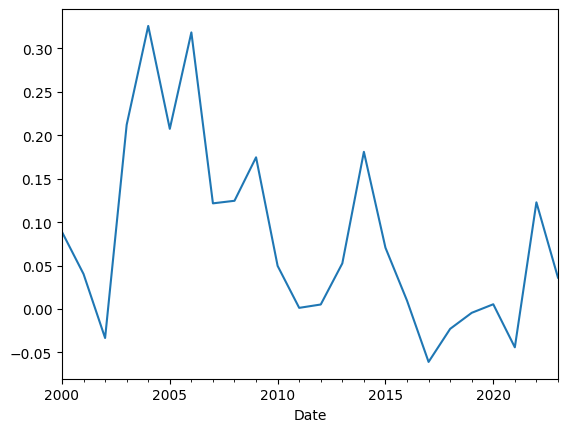

In [65]:
d_pnl = backtest.pnl["total"].cumsum().pct_change()

y_pnl = backtest.pnl["total"].cumsum().pct_change(freq="Y")
y_pnl = y_pnl[~y_pnl.isna()]

y_std = d_pnl.rolling(252).std()
y_std = y_std[~y_std.isna()]
y_std = y_std.reindex(y_pnl.index)

returns = backtest.pnl["total"].cumsum().pct_change()

mean_ret = returns.rolling(252).mean()
std = returns.rolling(252).std()

backtest.pnl['total'].resample('Y').apply(lambda x: x.mean() / x.std()).plot()

In [14]:
backtest.pnl.iloc[360:366]

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD,total
Date,,,,,,,,,,,
2001-05-21,86.022985,-226.665968,181.341513,310.507839,213.201433,-59.231881,-26.009696,0.000000,-0.000000,0.000000,479.166224
2001-05-22,-2364.737041,-2910.739666,2943.189596,-0.000000,-1813.289658,-0.000000,1243.218807,0.000000,-0.000000,-0.000000,-2902.357963
2001-05-23,-1283.183728,-744.598944,759.812435,17.547554,-1215.236861,129.257416,84.535618,-681.269762,-0.000000,-1502.260544,-4435.396817
2001-05-24,-36.106297,-368.304215,406.882120,265.555868,601.247031,0.000000,-33.426223,-28.629133,109.279974,-738.198333,178.300792
2001-05-25,0.000000,-161.177053,108.704092,743.731407,708.048147,51.666236,-0.000000,-0.000000,132.030440,-167.769832,1415.233436
2001-05-28,112.818430,298.411113,-246.754493,-82.716065,-331.789590,-140.899242,19.837072,-0.000000,-210.928661,-121.397833,-703.419270


# FX Fixes

In [2]:
fx_london_fix = pd.read_excel('../data/fx_fixes.xlsx', sheet_name='LON_Fix', index_col=0, parse_dates=True)
fx_ny_fix = pd.read_excel('../data/fx_fixes.xlsx', sheet_name='NY_Fix', index_col=0, parse_dates=True)
fx_london_fix.columns = [col.split()[0] for col in fx_london_fix.columns]
fx_ny_fix.columns = [col.split()[0] for col in fx_ny_fix.columns]

In [3]:
def convert_fx(df: pd.DataFrame):
    new_df = df.copy()
    for col in df.columns: 
        if col[:3] == 'USD': 
            new_df[col[3:] + 'USD'] = 1/df[col]
            new_df.drop(col, axis=1, inplace=True)
            
    return new_df
fx_london_fix = convert_fx(fx_london_fix)
fx_ny_fix = convert_fx(fx_ny_fix) 

In [4]:
fx_london_fix.head()

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD
Date,,,,,,,,,,
2023-11-15,0.6505,6.8700,1.0857,1.2461,0.6037,0.729980,1.124986,0.006648,0.092100,0.094641
2023-11-14,0.6495,6.8603,1.0873,1.2493,0.5990,0.729182,1.123217,0.006640,0.091831,0.094371
2023-11-13,0.6384,6.9738,1.0696,1.2268,0.5886,0.725111,1.108647,0.006595,0.090293,0.092239
2023-11-10,0.6357,6.9832,1.0679,1.2217,0.5888,0.724113,1.108156,0.006598,0.089834,0.091628
2023-11-09,0.6413,6.9662,1.0705,1.2267,0.5939,0.726216,1.110494,0.006619,0.089697,0.092115


In [5]:
fx_ny_fix.head()

,AUDUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,DKKUSD,JPYUSD,NOKUSD,SEKUSD
Date,,,,,,,,,,
2023-11-15,0.6506,1.0853,1.2457,0.6035,0.729767,1.124986,0.145507,0.006646,0.092051,0.094603
2023-11-14,0.6507,1.0879,1.2499,0.6008,0.730300,1.124733,0.145845,0.006650,0.091894,0.094410
2023-11-13,0.6377,1.0698,1.2279,0.5877,0.724375,1.109139,0.143437,0.006591,0.090213,0.092226
2023-11-10,0.6361,1.0686,1.2227,0.5891,0.724638,1.107788,0.143281,0.006600,0.089983,0.091773
2023-11-09,0.6367,1.0668,1.2223,0.5894,0.724218,1.107542,0.143039,0.006607,0.089118,0.091519


# Swaps Fixes

In [10]:
countries_to_fx = {
    'AD': 'AUDUSD',
    'CD': 'CADUSD', 
    'SF': 'CHFUSD', 
    'DK': 'DKKUSD',
    'EU': 'EURUSD',
    'BP': 'GBPUSD',
    'JY': 'JPYUSD',
    'NK': 'NOKUSD', 
    'ND': 'NZDUSD',
    'SK': 'SEKUSD',
    'US': 'USD',
}

In [11]:
swaps_london_fix = pd.read_excel('../data/swaps_fixes.xlsx', sheet_name='LON_Fix', index_col=0, parse_dates=True)
swaps_ny_fix = pd.read_excel('../data/swaps_fixes.xlsx', sheet_name='NY_Fix', index_col=0, parse_dates=True)
swaps_london_fix.columns = [countries_to_fx[col.split()[0][:2]] for col in swaps_london_fix.columns]
swaps_ny_fix.columns = [countries_to_fx[col.split()[0][:2]] for col in swaps_ny_fix.columns]

In [12]:
swaps_london_fix.head()

,AUDUSD,CADUSD,CHFUSD,DKKUSD,EURUSD,GBPUSD,JPYUSD,NOKUSD,NZDUSD,SEKUSD,USD
Date,,,,,,,,,,,
2023-11-15,4.6102,5.1435,NaN,3.6404,3.5030,NaN,NaN,4.602,5.1913,3.7375,NaN
2023-11-14,4.6369,4.8088,NaN,3.6530,3.5055,NaN,NaN,4.636,5.3350,3.7655,NaN
2023-11-13,4.7344,4.9851,NaN,3.7260,3.5825,NaN,NaN,4.707,5.3700,3.8940,NaN
2023-11-10,4.6950,4.9721,NaN,3.7050,3.5720,NaN,NaN,4.702,5.3150,3.8730,NaN
2023-11-09,4.6690,4.9355,NaN,3.6667,3.5230,NaN,NaN,4.631,5.3050,3.8269,NaN


In [13]:
swaps_ny_fix.head()

,AUDUSD,CADUSD,CHFUSD,DKKUSD,EURUSD,GBPUSD,JPYUSD,NOKUSD,NZDUSD,SEKUSD,USD
Date,,,,,,,,,,,
2023-11-15,4.6093,5.1435,NaN,3.6392,3.5010,NaN,NaN,4.602,5.1913,3.7390,NaN
2023-11-14,4.6508,4.8063,NaN,3.6530,3.5050,NaN,NaN,4.636,5.2200,3.7655,NaN
2023-11-13,4.7309,4.9851,NaN,3.7260,3.5825,NaN,NaN,4.707,5.3500,3.8804,NaN
2023-11-10,4.6950,4.9655,NaN,3.7050,3.5720,NaN,NaN,4.702,5.3150,3.8677,NaN
2023-11-09,4.6883,4.9934,NaN,3.6667,3.5245,NaN,NaN,4.631,5.3250,3.8269,NaN


In [14]:
swaps_london_fix.columns

Index(['AUDUSD', 'CADUSD', 'CHFUSD', 'DKKUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NOKUSD', 'NZDUSD', 'SEKUSD', 'USD'],
      dtype='object')

In [15]:
swaps_ny_fix.columns

Index(['AUDUSD', 'CADUSD', 'CHFUSD', 'DKKUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NOKUSD', 'NZDUSD', 'SEKUSD', 'USD'],
      dtype='object')

In [28]:
nzd_data = pd.read_excel('../data/infl_data.xlsx', sheet_name='nzd_exp_inf_2y')
nzd_data.set_index('Date', inplace=True)
nzd_data.head()

,NZD
Date,
2023-11-20,2.76
2023-09-30,2.83
2023-06-30,2.79
2023-03-31,3.30
2022-12-31,3.62


In [29]:
infl_swaps = pd.read_excel('../data/infl_data.xlsx', sheet_name='inflation_swaps_2y')
infl_swaps.set_index('Date', inplace=True)
infl_swaps.head()


,AUD,USD,DKK,GBP,JPY
Date,,,,,
2023-11-20,3.025,2.2790,NaN,3.9325,NaN
2023-11-17,3.030,2.2750,NaN,3.9190,NaN
2023-11-16,3.010,2.2350,NaN,3.9570,NaN
2023-11-15,3.007,2.2710,NaN,4.0090,NaN
2023-11-14,3.010,2.2799,NaN,4.0687,NaN


In [30]:
eu_infl_swaps = pd.read_excel(
    "../data/infl_data.xlsx", sheet_name="eur_infl_swaps_2y"
)
eu_infl_swaps.set_index("Date", inplace=True)
eu_infl_swaps.head()

,EUR
Date,
2023-11-20,2.1890
2023-11-17,2.1563
2023-11-16,2.0870
2023-11-15,2.2050
2023-11-14,2.2513


In [31]:
cpi_chf = pd.read_excel("../data/infl_data.xlsx", sheet_name="cpi_chf")
cpi_chf.set_index("Date", inplace=True)
cpi_chf.head()


,CHF Core CPI
Date,
2023-10-31,1.5
2023-09-30,1.3
2023-08-31,1.5
2023-07-31,1.7
2023-06-30,1.8


In [32]:
cpi_cad = pd.read_excel("../data/infl_data.xlsx", sheet_name="cpi_cad")
cpi_cad.set_index("Date", inplace=True)
cpi_cad.head()

,CAD Core CPI
Date,
2023-09-30,3.09
2023-06-30,3.65
2023-03-31,4.64
2022-12-30,5.68
2022-09-30,5.96


In [33]:
cpi_nor = pd.read_excel("../data/infl_data.xlsx", sheet_name="cpi_nor")
cpi_nor.set_index("Date", inplace=True)
cpi_nor.head()

,NOK CPI
Date,
2023-10-31,4.0
2023-09-30,3.3
2023-08-31,4.8
2023-07-31,5.4
2023-06-30,6.4


In [34]:
cpi_dkk = pd.read_excel("../data/infl_data.xlsx", sheet_name="cpi_dkk")
cpi_dkk.head()


def process(col):
    if isinstance(col, str):
    
        new_col = col.replace(",", " ")
        date = "-".join(new_col.replace(",", " ").split()[:-1])

        return pd.to_datetime(date)
    return col
    


cpi_dkk["Date"] = pd.to_datetime(cpi_dkk["Date"].apply(process))
cpi_dkk.set_index("Date", inplace=True)
cpi_dkk.sort_index(inplace=True)

cpi_dkk
# cpi_dkk.set_index([col.split()[:-1] for col in cpi_dkk['Date']], inplace=True)

,DKK CPI
Date,
2000-01-01,3.1
2000-02-01,3.1
2000-03-01,3.0
2000-04-01,3.2
2000-05-01,3.1
...,...
2023-07-10,2.5
2023-08-10,3.1
2023-09-11,2.4


In [35]:
be_sw = pd.read_excel("../data/infl_data.xlsx", sheet_name="be_sw")
be_sw.set_index("Date", inplace=True)
be_sw.head()

,SEK BE Inflation (2y)
Date,
2023-11-20,1.590
2023-11-17,1.582
2023-11-16,1.590
2023-11-15,1.590
2023-11-14,1.613


In [37]:
from pyparsing import col


df = pd.concat(
    [
        infl_swaps.drop("DKK", axis=1),
        eu_infl_swaps,
        nzd_data,
        cpi_chf,
        cpi_cad,
        cpi_nor,
        be_sw,
        cpi_dkk,
    ],
    axis=1,
    join="outer",
)


# infl_swaps.merge(nzd_data, left_index=True, right_index=True, join)
def fill_cpi(col: pd.Series):
    if "CPI" in col.name or col.name == "NZD":
        return col.ffill()
    return col


df = df.apply(fill_cpi, axis=0)
df.fillna(method="ffill", inplace=True)
df.columns = [col.split()[0] for col in df.columns]
df.tail()

C:\Users\andre\AppData\Local\Temp\ipykernel_22536\476897546.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


,AUD,USD,GBP,JPY,EUR,NZD,CHF,CAD,NOK,SEK,DKK
Date,,,,,,,,,,,
2023-11-14,3.010,2.2799,4.0687,0.904,2.2513,2.83,1.5,3.09,4.0,1.613,0.1
2023-11-15,3.007,2.2710,4.0090,0.904,2.2050,2.83,1.5,3.09,4.0,1.590,0.1
2023-11-16,3.010,2.2350,3.9570,0.904,2.0870,2.83,1.5,3.09,4.0,1.590,0.1
2023-11-17,3.030,2.2750,3.9190,0.904,2.1563,2.83,1.5,3.09,4.0,1.582,0.1
2023-11-20,3.025,2.2790,3.9325,0.904,2.1890,2.76,1.5,3.09,4.0,1.590,0.1


In [39]:
df.to_excel('../data/fmt_infl_data.xlsx')

# CPI Data

In [41]:
currencies = ['AUD', 'DKK', 'EUR', 'GBP', 'NZD', 'CAD', 'CHF',
       'JPY', 'NOK', 'SEK', 'USD']
cpi_path = '../data/cpi_data.xlsx'

In [42]:
cpis = []

for currency in currencies:
    df = pd.read_excel(cpi_path, sheet_name='CPI_' + currency, index_col=0)
    df.index = pd.to_datetime(df.index)
    df.columns = [currency]
    cpis.append(df)


In [47]:
cpidf = pd.concat(cpis, axis=1, join='outer')
cpidf = cpidf.dropna(how='all')
cpidf.tail(50)
cpidf = cpidf[~cpidf['EUR'].isna()]

In [35]:
cpidf.to_excel('../data/fmt_cpi_data.xlsx')